In [15]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import os

os.chdir("../scripts")

In [4]:
from aux_NonLinCFA import prepare_features
from clustering_operations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def plot_clusters(output, figsize=(16,10), s=1, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []

    cmap = plt.cm.colors.ListedColormap(np.random.rand(len(output), 3))
    markers = cycle(['o', 's', '^', 'v', 'D', 'p', 'h'])

    plt.figure(figsize=figsize)
    #plt.title(title, fontsize = 12)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    # iterate over all the features aggregations
    for j in range (len(output)):       # j iterates all the clusters
        X = [float(element.split('_')[0]) for element in output[j]]
        Y = [float(element.split('_')[1]) for element in output[j]]
        marker = next(markers)
        plt.scatter(X, Y, s=s, color=cmap(j), marker=marker)

In [6]:
colnames = ['cyclostationary_mean_tg',
        'cyclostationary_mean_tg_1w',
        'cyclostationary_mean_tg_4w',
        'cyclostationary_mean_tg_8w',
        'cyclostationary_mean_tg_12w',
        'cyclostationary_mean_tg_16w',
        'cyclostationary_mean_tg_24w',
        'cyclostationary_mean_rr',
        'cyclostationary_mean_rr_1w',
        'cyclostationary_mean_rr_4w',
        'cyclostationary_mean_rr_8w',
        'cyclostationary_mean_rr_12w',
        'cyclostationary_mean_rr_16w',
        'cyclostationary_mean_rr_24w']

col = colnames[9]
path = "../data/Emiliani1_aggreg.csv"
df_train_unfolded_std,df_val_unfolded_std,df_test_unfolded_std,df_trainVal_unfolded_std = prepare_features(path,col,multiple=False,max_train='2013-11-22', 
                            max_val='2018-04-10', max_test='2022-12-31', cols_order = "bottom_left", no_winter = False, only_winter = False)

In [9]:
df_train_unfolded_std.columns = df_train_unfolded_std.columns.str.replace('mean_', '')

In [11]:
neighbors_01 = compute_neighbors(df_train_unfolded_std, max_distance = 0.1)

Computing neighbors...


100%|██████████| 172/172 [00:00<00:00, 432.74it/s]

Neighbors computed


In [127]:
clusters_01_c088 = compute_clusters(df_train_unfolded_std, neighbors_01, method='correlation', threshold=0.9, noise=True)

Computing clusters...


175it [00:02, 79.63it/s]                         

Clusters computed


#clusters : 9


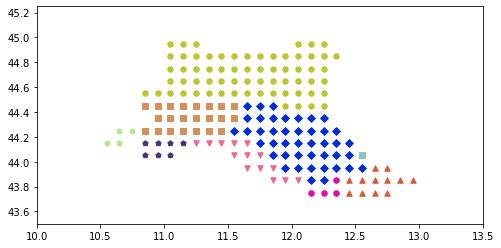

In [128]:
print("#clusters : " + str(len(clusters_01_c088)))
plot_clusters(clusters_01_c088, figsize=(8, 4), s=30, xmin=10, xmax=13.5, ymin=43.5, ymax=45.25)

In [129]:
clusters_01_d088 = compute_clusters(df_train_unfolded_std, neighbors_01, method='distance', threshold=11, noise=True)

Computing clusters...


 99%|█████████▉| 171/172 [00:04<00:00, 38.72it/s]

Clusters computed


#clusters : 9


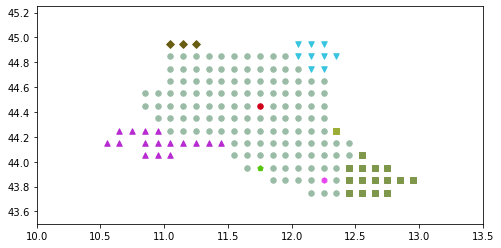

In [134]:
print("#clusters : " + str(len(clusters_01_d088)))
plot_clusters(clusters_01_d088, figsize=(8, 4), s=30, xmin=10, xmax=13.5, ymin=43.5, ymax=45.25)